In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np

In [184]:
with open('data/final_df.pickle', 'rb') as f:
    df = pickle.load(f)

### Class Imbalance

In [185]:
df.groupby(['category'])['id'].count()/len(df)

category
Athlete    0.008456
Average    0.207763
Fitness    0.050989
Obese      0.732792
Name: id, dtype: float64

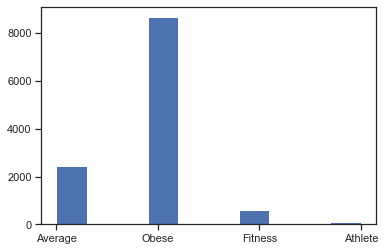

In [186]:
plt.hist(df['category']);

### Discussion on Imbalanced Data


- Three options here:
    - Pre-processing - resampling:
        - Undersampling: Not a great approach due to minimal data (to get the ratios reasonable, would result in reducing overall data size by a considerable amount because the )
        - Oversampling: One concern with this approach is that oversampling prior to doing a validation loop (and not during) is that it would result in overfitting where a sample is both in the train set and the validation set. Unfortunately, this would not work well with sklearn's cross_validation, which does not have an oversampling parameter. Therefore any CV or GridSearch (for best parameters) would need to be implemented manually
        - Synthetic Options
            - Smote and ADASYN: Similar concerns to the the oversampling technique, even though it would not be as drastic
        - **My approach: Oversampling + SMOTE + ADASYN**
            - Created a function (painstakingly so) that can allow for oversampling, CV, and gridsearch all in one. This is necessary, given data size, need to cross validate and account for oversampling together
            - Unfortunately, it only allows for one oversampling technique and one estimator (ML technique) at a time. Would need a separate loop to test out multiple sampling techniques or ML techniques (e.g. RandomForest vs Naive Bayes)
           
    - During Model - Class Weights:
        - This one is easy to implement and makes sense for the multi-class model, by putting additional weight on the classifications that are of more interest but infrequent "athlete" and "fitness"
        - This is only available for some models
    - After Model - Threshold Adjustment:
        - This approach would depend on the model is not easy to implement under a multi-class model, where the classifier selects the class with the highest probability. To attempt a threshold adjustment would require building model logic from scratch and overwriting the class selection, such that some classes (given certain thresholds) would be selected in favor of others with higher probabilities. Due to the model complexity (in building and explaining) this approach was not attempted.

In [187]:
df.describe()

,id,age,body_fat,try_to_lose,ate_less,low_cal_foods,ate_less_fat,exercise,skip_meals,'diet'_foods,...,low_carb_dr,high_protein,gluten_free,renal_kidney,other_diet,vig_work_days,mod_work_days,walk_bike_days,vig_rec_days,mod_rec_days
count,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,...,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000
mean,82384.162100,37.655082,32.734086,0.348554,0.279554,0.154152,0.145019,0.331304,0.084052,0.040166,...,0.012092,0.004313,0.002452,0.000761,0.005243,0.983934,1.737020,1.423558,1.078894,1.510316
std,11536.227604,12.407943,8.672151,0.476533,0.448799,0.361110,0.352135,0.470702,0.277478,0.196356,...,0.109301,0.065531,0.049461,0.027578,0.072219,1.958576,2.382426,2.419501,1.803295,2.073190
min,62161.000000,18.000000,11.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71881.500000,27.000000,26.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,82356.500000,38.000000,32.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,91975.750000,48.000000,39.700000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,3.000000
max,102954.000000,59.000000,56.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [188]:
sns.set(style="ticks", color_codes=True)

In [189]:
import plotly.graph_objects as go

In [190]:
df.columns

Index(['id', 'data_cycle', 'age', 'gender', 'body_fat', 'self_image',
       'try_to_lose', 'ate_less', 'low_cal_foods', 'ate_less_fat', 'exercise',
       'skip_meals', ''diet'_foods', 'liquid_diet', 'wt_loss_program',
       'rx_diet_pills', 'non-rx_diet_pills', 'lax_vomit', 'water',
       'special_diet_wh', 'low_carb_wh', 'smoke', 'fruit_veg_salad',
       'change_eat_habits', 'less_sugar', 'less_junk_fast', 'special_diet_dr',
       'low_cal', 'low_fat', 'low_salt', 'low_sugar', 'low_fiber',
       'high_fiber', 'diabetic_diet', 'bulking', 'low_carb_dr', 'high_protein',
       'gluten_free', 'renal_kidney', 'other_diet', 'vig_work_days',
       'mod_work_days', 'walk_bike_days', 'vig_rec_days', 'mod_rec_days',
       'category'],
      dtype='object')

In [191]:
df.describe()

,id,age,body_fat,try_to_lose,ate_less,low_cal_foods,ate_less_fat,exercise,skip_meals,'diet'_foods,...,low_carb_dr,high_protein,gluten_free,renal_kidney,other_diet,vig_work_days,mod_work_days,walk_bike_days,vig_rec_days,mod_rec_days
count,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,...,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000,11826.000000
mean,82384.162100,37.655082,32.734086,0.348554,0.279554,0.154152,0.145019,0.331304,0.084052,0.040166,...,0.012092,0.004313,0.002452,0.000761,0.005243,0.983934,1.737020,1.423558,1.078894,1.510316
std,11536.227604,12.407943,8.672151,0.476533,0.448799,0.361110,0.352135,0.470702,0.277478,0.196356,...,0.109301,0.065531,0.049461,0.027578,0.072219,1.958576,2.382426,2.419501,1.803295,2.073190
min,62161.000000,18.000000,11.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71881.500000,27.000000,26.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,82356.500000,38.000000,32.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,91975.750000,48.000000,39.700000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,3.000000
max,102954.000000,59.000000,56.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [192]:
percent_wh = df.groupby('category')['try_to_lose', 'ate_less', 'low_cal_foods', 'ate_less_fat', 'exercise',
       'skip_meals', "'diet'_foods", 'liquid_diet', 'wt_loss_program',
       'rx_diet_pills', 'non-rx_diet_pills', 'lax_vomit', 'water',
       'special_diet_wh', 'low_carb_wh', 'smoke', 'fruit_veg_salad',
       'change_eat_habits', 'less_sugar', 'less_junk_fast'].mean()
percent_dr = df.groupby('category')['special_diet_dr',
       'low_cal', 'low_fat', 'low_salt', 'low_sugar', 'low_fiber',
       'high_fiber', 'diabetic_diet', 'bulking', 'low_carb_dr', 'high_protein',
       'gluten_free', 'renal_kidney', 'other_diet'].mean()

<ipython-input-192-407cdee1be2e>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-192-407cdee1be2e>:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [193]:
percent_wh = percent_wh.transpose()
percent_dr = percent_dr.transpose()

In [194]:
percent_wh = percent_wh.sort_values("Fitness", ascending=True)
percent_dr = percent_dr.sort_values("Fitness", ascending=True)

### Weight loss strategies and percentage within each category that do so

In [195]:
percent_wh

category,Athlete,Average,Fitness,Obese
rx_diet_pills,0.00,0.003256,0.000000,0.019617
smoke,0.00,0.004070,0.000000,0.006577
wt_loss_program,0.00,0.004477,0.001658,0.026079
lax_vomit,0.00,0.001628,0.003317,0.007270
non-rx_diet_pills,0.01,0.017908,0.004975,0.043503
special_diet_wh,0.02,0.015466,0.004975,0.033695
liquid_diet,0.02,0.009768,0.006633,0.032079
'diet'_foods,0.01,0.012210,0.009950,0.050542
skip_meals,0.01,0.035816,0.014925,0.103393
low_carb_wh,0.03,0.070818,0.034826,0.145857


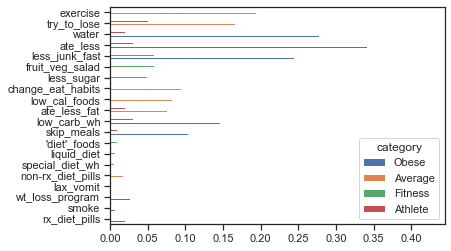

In [196]:
percent_wh[['Obese','Average','Fitness','Athlete']].plot(kind='barh', stacked=False);

#### Diets and the percentage within each category that do this

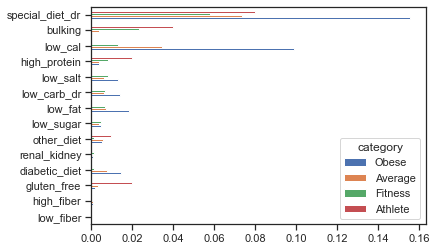

In [197]:
percent_dr[['Obese','Average','Fitness','Athlete']].plot(kind='barh', stacked=False);

In [198]:
percent_dr

category,Athlete,Average,Fitness,Obese
low_fiber,0.00,0.000000,0.000000,0.000115
high_fiber,0.00,0.000814,0.000000,0.000923
gluten_free,0.02,0.003663,0.000000,0.002077
diabetic_diet,0.00,0.007733,0.001658,0.014424
renal_kidney,0.00,0.000407,0.001658,0.000808
other_diet,0.01,0.005698,0.001658,0.005308
low_sugar,0.00,0.004070,0.004975,0.004731
low_fat,0.00,0.007326,0.006633,0.018578
low_carb_dr,0.00,0.006512,0.006633,0.014193
low_salt,0.00,0.006512,0.008292,0.013386


In [199]:
df.pivot_table(index='low_carb_wh',columns='low_carb_dr',aggfunc='count')['id']

low_carb_dr,0.0,1.0
low_carb_wh,,
0.0,10298,66
1.0,1385,77


Many more attempted low carb diet to lose weight within the last year; though they did not respond as low carb during the dietary review

In [200]:
df.pivot_table(index='special_diet_wh',columns='special_diet_dr',aggfunc='count')['id']

special_diet_dr,0.0,1.0
special_diet_wh,,
0.0,10047,1444
1.0,209,126


Interestingly, while not many were on a special diet to lose weight (wh), there were a significant amount considered themselves as on a diet during the dietary interview.

In [201]:
df.groupby(['category','ate_less'])['id'].count()

category  ate_less
Athlete   0.0           97
          1.0            3
Average   0.0         2143
          1.0          314
Fitness   0.0          567
          1.0           36
Obese     0.0         5713
          1.0         2953
Name: id, dtype: int64

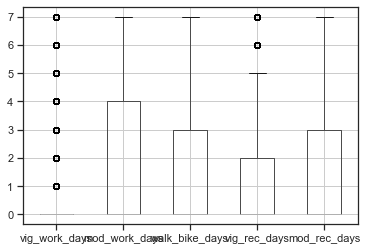

In [202]:
boxplot = df[['vig_work_days','mod_work_days', 'walk_bike_days', 'vig_rec_days', 'mod_rec_days']].boxplot()

/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



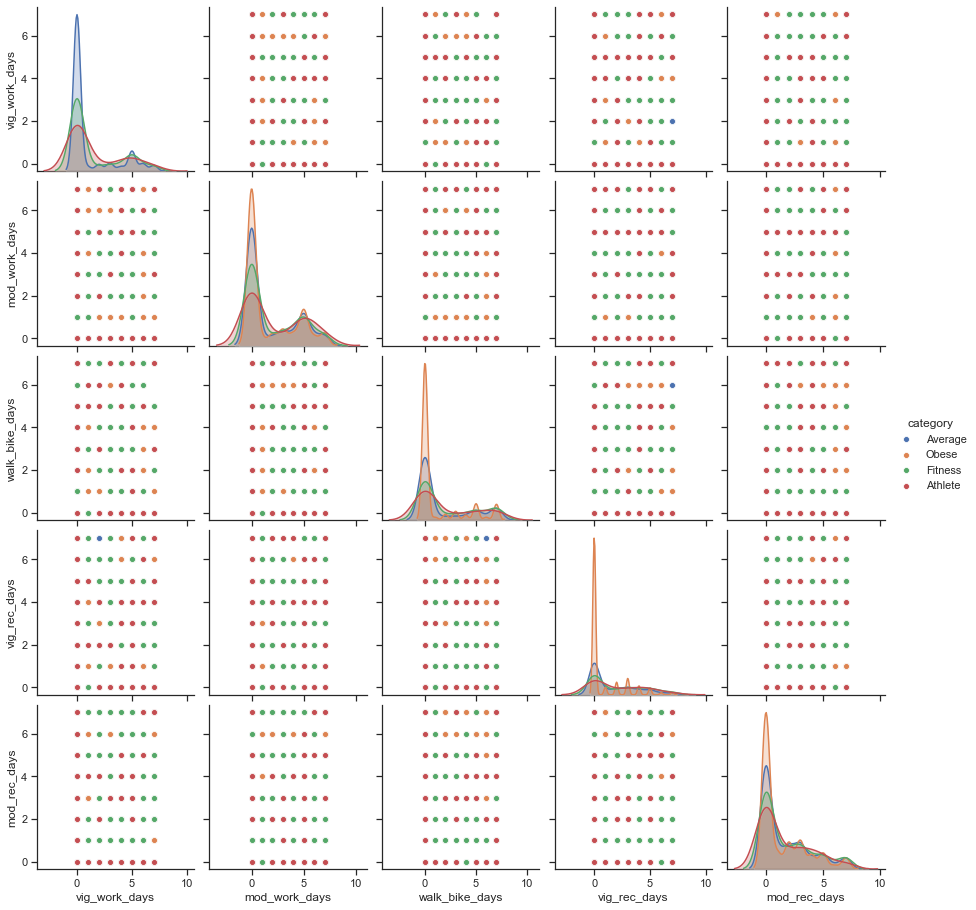

In [211]:
sns.pairplot(df[['vig_work_days','mod_work_days', 'walk_bike_days', 'vig_rec_days', 'mod_rec_days','category']],hue='category');

In [212]:
from plotly import express

In [224]:
pp = express.density_contour(df[['vig_work_days','mod_work_days','category']],x='vig_work_days',y='mod_work_days',color='category')
pp

In [227]:
pp = express.density_heatmap(df[['vig_rec_days','mod_rec_days','category']],x='vig_rec_days',y='mod_rec_days',color='category')
pp